In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Animation libraries
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

# Read image from URL and convert to color
from skimage import io,color

# Convolution
from scipy.signal import convolve2d

# Exercise 1

In [2]:
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
data = pd.read_csv(url, sep = ",", header = None)

data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

data = data._get_numeric_data()
data = data.drop(['state','fold'],axis=1).values
data_means = np.mean(data, axis = 0)
data -= data_means
cov_matrix = (1 / (data.shape[0] - 1)) * (data.T @ data)
cov_matrix

array([[ 0.01610509, -0.00095881,  0.00743543, ...,  0.0078588 ,
         0.01422331,  0.01085579],
       [-0.00095881,  0.02680317, -0.00278454, ..., -0.00193146,
        -0.00371296, -0.00133207],
       [ 0.00743543, -0.00278454,  0.06423288, ...,  0.008535  ,
         0.0158847 ,  0.03727496],
       ...,
       [ 0.0078588 , -0.00193146,  0.008535  , ...,  0.0524661 ,
         0.01137541,  0.00820928],
       [ 0.01422331, -0.00371296,  0.0158847 , ...,  0.01137541,
         0.05775768,  0.01952064],
       [ 0.01085579, -0.00133207,  0.03727496, ...,  0.00820928,
         0.01952064,  0.05428196]])

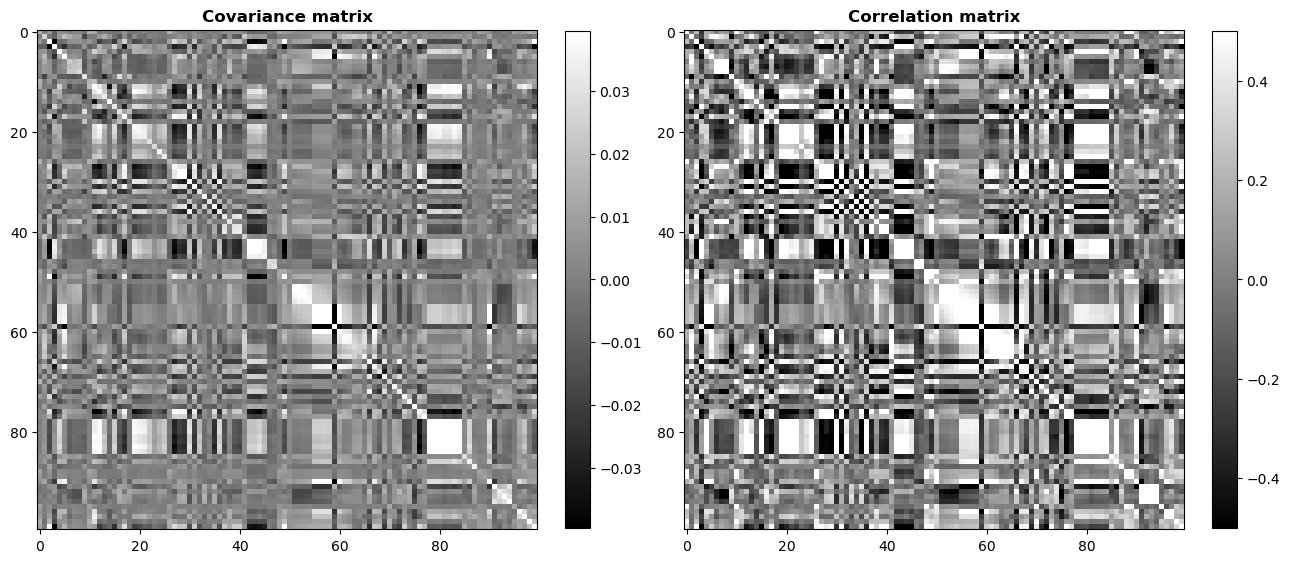

In [3]:
S = np.diag(1 / np.var(data, axis = 0)**0.5)
cor_matrix = S.T @ cov_matrix @ S

fig, ax = plt.subplots(1, 2, figsize = (13,6))
clim = np.max(np.abs(cov_matrix)) * 0.2
h1 = ax[0].imshow(cov_matrix, vmin = -clim, vmax = clim, cmap = "gray")
ax[0].set_title("Covariance matrix", fontweight = "bold")
h2 = ax[1].imshow(cor_matrix, vmin = -0.5, vmax = 0.5, cmap = "gray")
ax[1].set_title("Correlation matrix", fontweight = "bold")

fig.colorbar(h1, ax = ax[0], fraction = 0.045)
fig.colorbar(h2, ax = ax[1], fraction = 0.045)
plt.tight_layout()
plt.savefig('Figure_07_06.png',dpi=300)
plt.show()

- Recall how pre and postmultiplying by diagonal matrices affects a matrix (exercise 5-11)
    - Premultiplying scales each row by the associated diagonal entry
    - Postmultiping scales each column by the associated diagonal entry
- Pre and postmultiplying by the inverted standard deviation matrix ensures that each covariance term turns into the associated correlation term

# Exercise 2

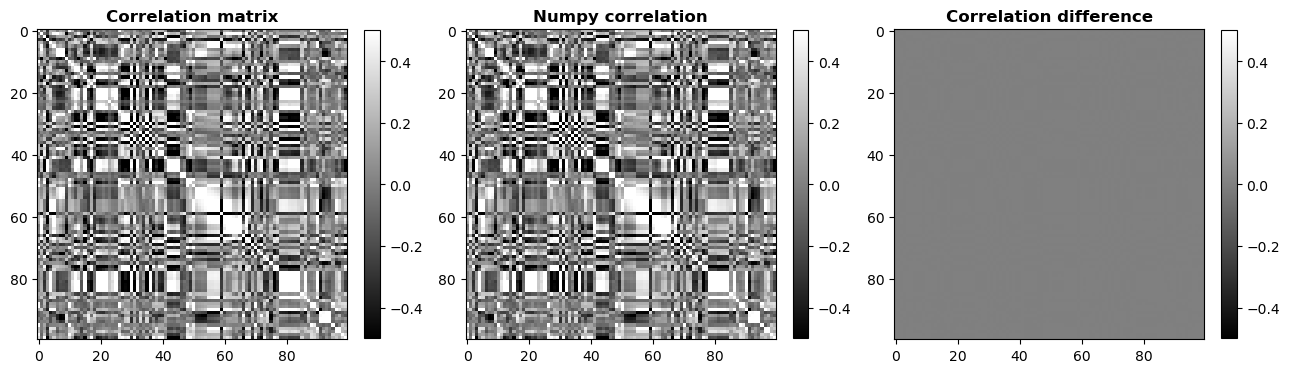

In [4]:
np_cor = np.corrcoef(data.T)
dif = cor_matrix - np_cor

fig, ax = plt.subplots(1, 3, figsize = (13,6))
h1 = ax[0].imshow(cor_matrix, vmin = -0.5, vmax = 0.5, cmap = "gray")
ax[0].set_title("Correlation matrix", fontweight = "bold")
h2 = ax[1].imshow(np_cor, vmin = -0.5, vmax = 0.5, cmap = "gray")
ax[1].set_title("Numpy correlation", fontweight = "bold")
h3 = ax[2].imshow(dif, vmin = -0.5, vmax = 0.5, cmap = "gray")
ax[2].set_title("Correlation difference", fontweight = "bold")

fig.colorbar(h1, ax = ax[0], fraction = .045)
fig.colorbar(h2, ax = ax[1], fraction = .045)
fig.colorbar(h3, ax = ax[2], fraction = .045)

plt.tight_layout()
plt.savefig('Figure_07_07.png',dpi=300)
plt.show()

# Exercise 3

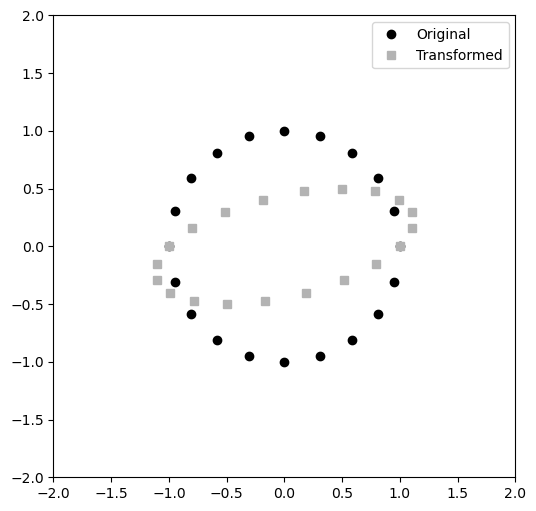

In [5]:
T = np.array([1, 0.5, 0, 0.5]).reshape(2,2)
T

# Define a set of points on a circle
theta = np.linspace(0, 2 * np.pi - (2*np.pi/20), 20)
points_0 = np.vstack((np.cos(theta),np.sin(theta)))

# Transform points using matrix
points_t = T @ points_0

plt.figure(figsize = (6,6))
plt.plot(points_0[0,:], points_0[1,:], "ko", label = "Original")
plt.plot(points_t[0,:], points_t[1,:], "s", color = [.7,.7,.7], label = "Transformed")
plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_07_08.png',dpi=300)
plt.show()

# Exercise 4

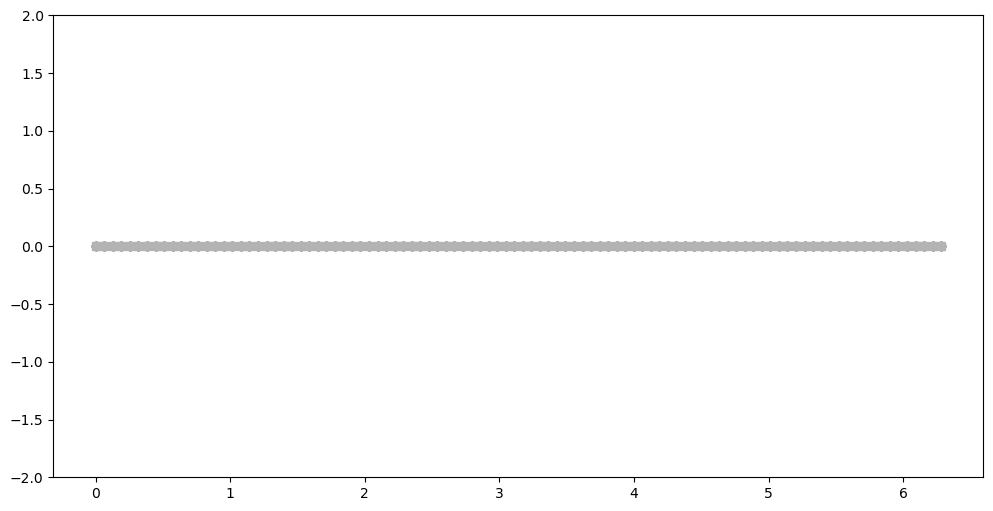

In [6]:
def aframe(ph):
    T = np.array([1 - ph/3, 0, 0, ph]).reshape(2,2)
    P1 = T @ Y1
    P2 = T @ Y2
    
    plth1.set_xdata(P1[0,:])
    plth1.set_ydata(P1[1,:])
    plth2.set_xdata(P2[0,:])
    plth2.set_ydata(P2[1,:])
    
    return (plth1,plth2)

th = np.linspace(0, 2*np.pi, 100)
Y1 = np.vstack((th,np.cos(th)))
Y2 = np.vstack((th,np.sin(th)))


# setup figure
fig, ax = plt.subplots(1, figsize = (12,6))

plth1, = ax.plot(Y1[0,:], Y1[1,:], "ko")
plth2, = ax.plot(Y2[0,:], Y2[1,:], "s", color = [.7,.7,.7])
ax.set_ylim([-2,2])

phi = 1 - np.linspace(-1,1-1/40,40)**2
animation.FuncAnimation(fig, aframe, phi, interval = 50, repeat = True)

- Exercises 5, 6, 7 from this chapter use the convolve2d function from the scipy library to smooth images
- convolve2d is a convolution, which is basically a more efficient way of double looping over an image and applying a kernel
- In particular, the exercises use smoothing kernels, which smooths sharp image features and emphasizes soft features
- Might do these later if bored...